In [1]:
!ls

 Data_Driver1.csv   Dataset_explorer.ipynb
 Data_Driver2.csv  'OBD-II Driving Data - Classified.csv'
 Data_Driver3.csv   useful_features.txt


In [7]:
import pandas as pd
import seaborn as sns

# Import Required Libraries
import matplotlib.pyplot as plt

# Load CSV Data
df = pd.read_csv('./OBD-II Driving Data - Classified.csv')  # Replace 'your_data.csv' with your actual file path

# Featrue Engineering to comply with the test requirements
df['Intake manifold absolute pressure [mbar]'] = df['Intake manifold absolute pressure [kPa]'] * 10
# Create AFR from equivalence ratio (λ)
stoichiometric_ratio = 14.7  # For gasoline
df['AFR'] = df['O2 sensor equivalence ratio (Bank 1 - Sensor 1)'] * stoichiometric_ratio
# Idle detection flag (Fxx)
df['Idle_flag'] = ((df['Absolute throttle position [%]'] == 0) & 
                   (df['Vehicle speed [km/h]'] == 0)).astype(int)

engineered_features = ['Engine RPM [rpm]',
 'Absolute throttle position [%]',
 'Vehicle speed [km/h]',
 'Engine coolant temperature [°C]',
 'O2 sensor equivalence ratio (Bank 1 - Sensor 1)',
 'Intake manifold absolute pressure [kPa]',
 'Ignition timing advance [°]',
 'Intake air temperature [°C]',
 'Battery voltage [V]',
 'Accelerator pedal position D [%]',
 'Engine load [%]',
 'Commanded air-fuel equivalence ratio',
 'Idle_flag']

df = df[engineered_features]

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 555000 entries, (np.float64(13.1), np.float64(18.0)) to (np.float64(13.2), np.float64(18.0))
Data columns (total 13 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   Engine RPM [rpm]                                 555000 non-null  float64
 1   Absolute throttle position [%]                   555000 non-null  int64  
 2   Vehicle speed [km/h]                             555000 non-null  int64  
 3   Engine coolant temperature [°C]                  555000 non-null  float64
 4   O2 sensor equivalence ratio (Bank 1 - Sensor 1)  555000 non-null  int64  
 5   Intake manifold absolute pressure [kPa]          555000 non-null  int64  
 6   Ignition timing advance [°]                      555000 non-null  float64
 7   Intake air temperature [°C]                      555000 non-null  float64
 8   Battery voltage [V]          

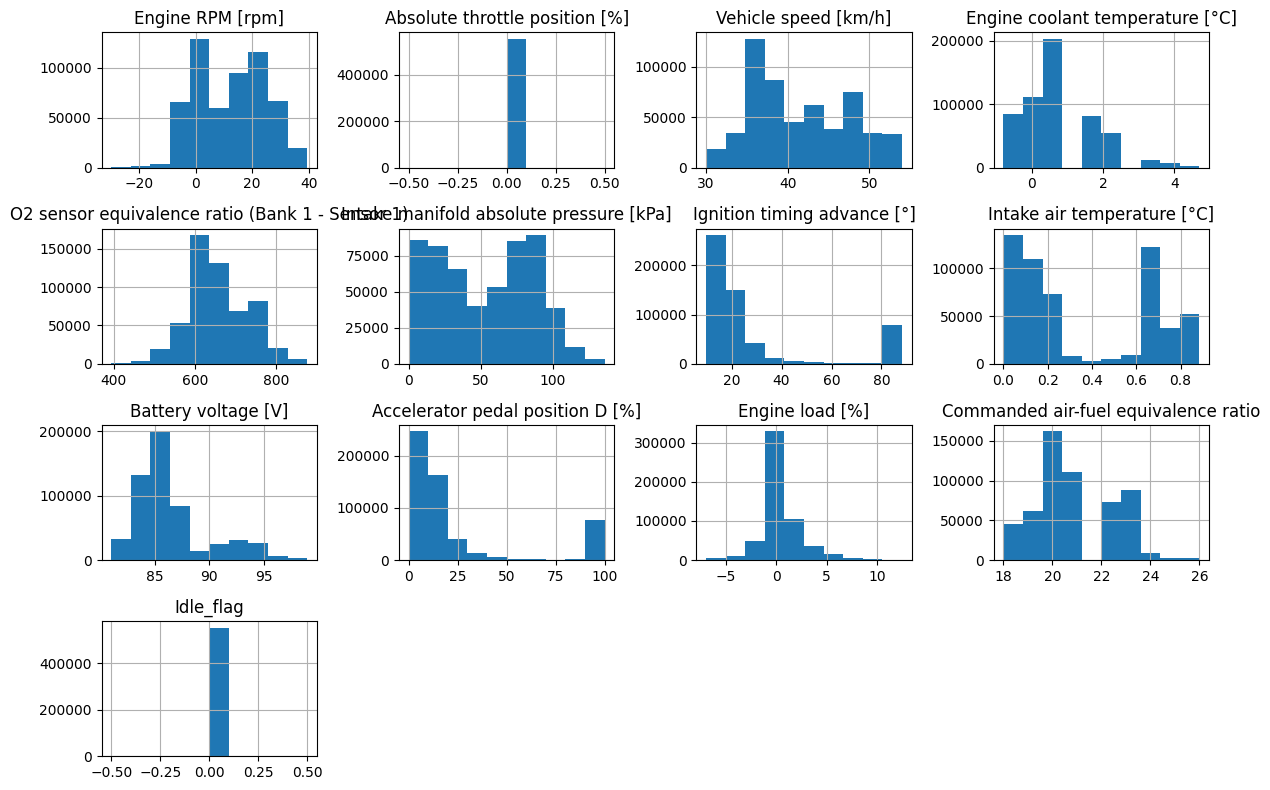

In [8]:
# Display Basic Data Information
print(df.info())
print(df.describe())
print(df.head())

# Visualize Data Distributions
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

In [ ]:
# Visualize Correlations
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Plot Time Series (if applicable)
# Replace 'date_column' and 'value_column' with actual column names
if 'date_column' in df.columns and 'value_column' in df.columns:
    df['date_column'] = pd.to_datetime(df['date_column'])
    df.set_index('date_column')['value_column'].plot(figsize=(12, 6))
    plt.title('Time Series Plot')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.show()

In [8]:
df.columns

Index(['TIMESTAMP', 'MARK', 'MODEL', 'CAR_YEAR', 'ENGINE_POWER', 'AUTOMATIC',
       'VEHICLE_ID', 'BAROMETRIC_PRESSURE(KPA)', 'ENGINE_COOLANT_TEMP',
       'FUEL_LEVEL', 'ENGINE_LOAD', 'AMBIENT_AIR_TEMP', 'ENGINE_RPM',
       'INTAKE_MANIFOLD_PRESSURE', 'MAF', 'LONG TERM FUEL TRIM BANK 2',
       'FUEL_TYPE', 'AIR_INTAKE_TEMP', 'FUEL_PRESSURE', 'SPEED',
       'SHORT TERM FUEL TRIM BANK 2', 'SHORT TERM FUEL TRIM BANK 1',
       'ENGINE_RUNTIME', 'THROTTLE_POS', 'DTC_NUMBER', 'TROUBLE_CODES',
       'TIMING_ADVANCE', 'EQUIV_RATIO', 'MIN', 'HOURS', 'DAYS_OF_WEEK',
       'MONTHS', 'YEAR'],
      dtype='object')